In [1]:
import torch
from fastai.vision.all import *

if torch.cuda.is_available():
    print("CUDA is available on this system.")
else:
    print("CUDA is NOT available on this system.")

/home/ippen/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA is available on this system.


In [2]:
# Fix Display behavior in Jupyter Notebooks for VS Code
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

(88, 35)


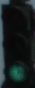

In [3]:
project_path = '/home/ippen/personal/traffic-light-classification/datasets/dtld/cropped_tl/'
city = 'Frankfurt'
image_path = project_path + city + '/images'

files = get_image_files(image_path)
img = PILImage.create(files[15])
print(img.shape)
img.to_thumb(128)

In [4]:
from fastcore.parallel import *

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

(30, 70)     19
(32, 78)     19
(31, 74)     18
(30, 72)     17
(31, 76)     16
             ..
(40, 91)      1
(48, 128)     1
(51, 137)     1
(60, 112)     1
(45, 107)     1
Length: 905, dtype: int64

In [5]:
# Check Maximal Image Size
max_size = 0
for i in range(len(files)):
    img = PILImage.create(files[i])
    if max_size < img.shape[0]:
        max_size = img.shape[0]
    if max_size < img.shape[1]:
        max_size = img.shape[1]
print(max_size)

200


In [6]:
def get_label_func(file_name, labels_file):
    # Load the JSON file with class labels
    with open(labels_file, "r") as f:
        labels_data = json.load(f)

    # Extract the class label based on the file name
    tl = labels_data[file_name]
    return tl["state"] + tl["pictogram"]

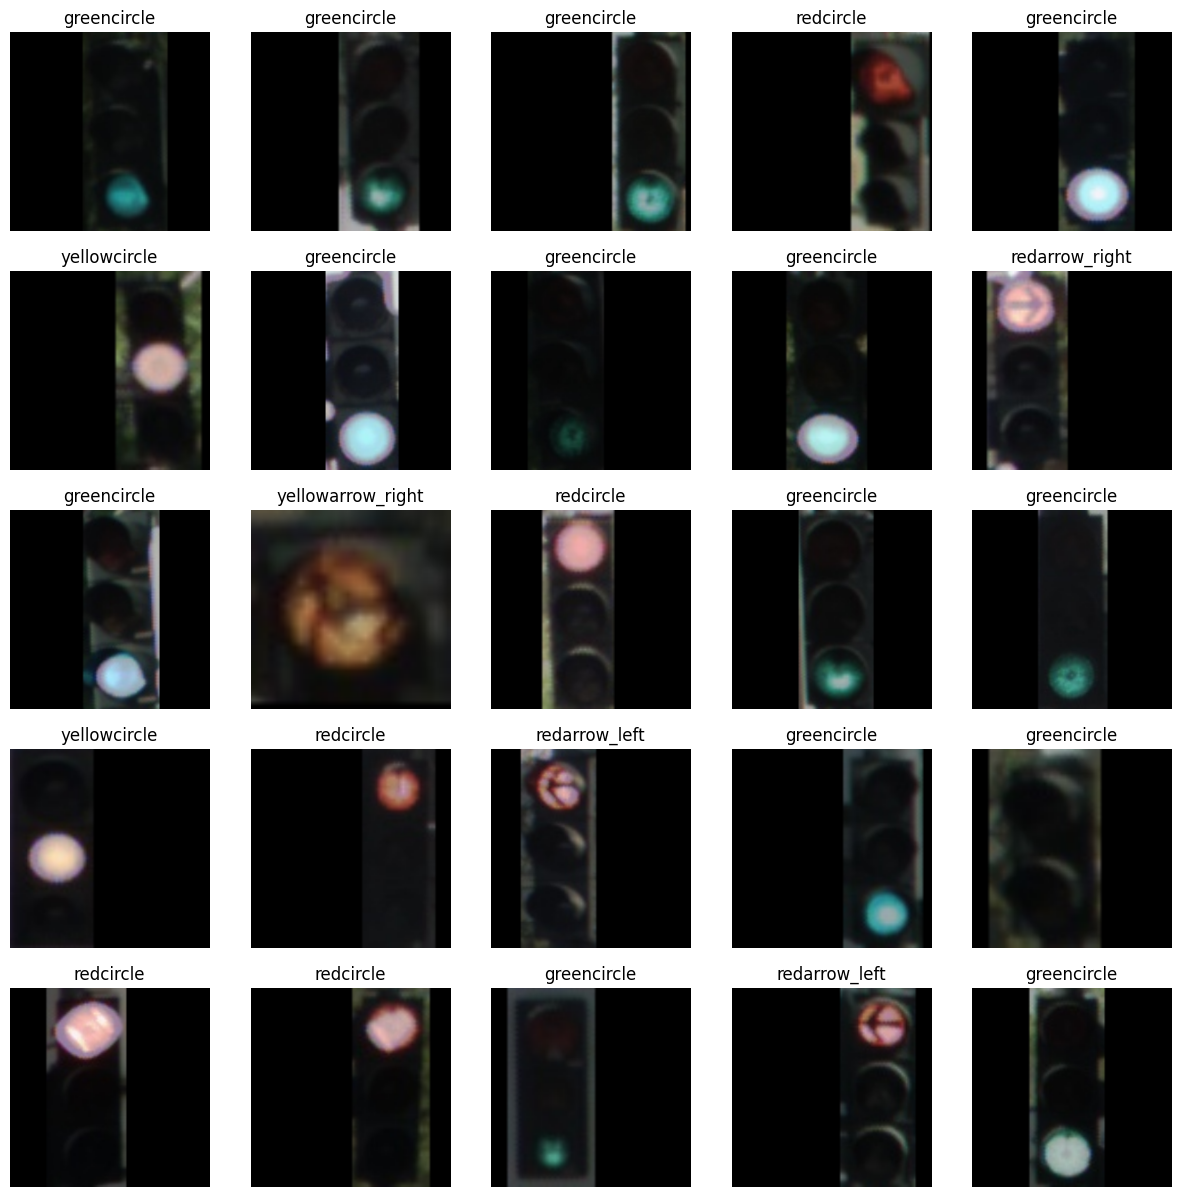

In [7]:
dls = ImageDataLoaders.from_name_func(image_path, get_image_files(project_path + city), valid_pct=0.2, seed=42,
    item_tfms=Resize(224, ResizeMethod.Pad, pad_mode='zeros'),
    batch_tfms=None,
    label_func=lambda file_name: get_label_func(file_name, project_path + city + '/labels.json'))

dls.show_batch(max_n=25)

In [8]:
from tabulate import tabulate

def examine_dataset(cities):
    table = []
    headers = ["City"] + [f"{state}{pictogram}" for state in ["red", "red_yellow", "yellow", "green", "off"] for pictogram in ["circle", "arrow_left", "arrow_straight", "arrow_right"]] + ["Total"]
    
    for city in cities:
        missing_class = [city]
        labels_file = project_path + city + '/labels.json'
        dls = ImageDataLoaders.from_name_func(image_path, get_image_files(project_path + city), valid_pct=0.2, seed=42,
            item_tfms=Resize(224, ResizeMethod.Pad, pad_mode='zeros'),
            batch_tfms=None,
            label_func=lambda file_name: get_label_func(file_name, labels_file))
        
        for state in ["red", "red_yellow", "yellow", "green", "off"]:
            for pictogram in ["circle", "arrow_left", "arrow_straight", "arrow_right"]:
                class_label = state + pictogram
                num_train_items = sum(1 for item in dls.train.items if get_label_func(item.name, labels_file) == class_label)
                num_valid_items = sum(1 for item in dls.valid.items if get_label_func(item.name, labels_file) == class_label)
                total_items = num_train_items + num_valid_items
                missing_class.append(total_items)
        
        num_images = len(dls.train.items) + len(dls.valid.items)
        missing_class.append(num_images)
        table.append(missing_class)
    
    display(tabulate(table, headers=headers, tablefmt='html'))

examine_dataset(cities = ["Berlin", "Bochum", "Bremen", "Dortmund", "Duesseldorf", "Essen", "Frankfurt", "Fulda", "Hannover", "Kassel", "Koeln"])

City,redcircle,redarrow_left,redarrow_straight,redarrow_right,red_yellowcircle,red_yellowarrow_left,red_yellowarrow_straight,red_yellowarrow_right,yellowcircle,yellowarrow_left,yellowarrow_straight,yellowarrow_right,greencircle,greenarrow_left,greenarrow_straight,greenarrow_right,offcircle,offarrow_left,offarrow_straight,offarrow_right,Total
Berlin,384,48,7,27,54,1,0,0,46,2,0,2,784,45,7,5,125,0,0,0,1537
Bochum,44,56,0,5,9,2,0,0,0,21,0,9,255,16,19,9,8,0,0,0,453
Bremen,34,18,0,2,3,0,0,0,0,0,0,0,166,12,6,0,116,0,0,0,357
Dortmund,610,270,35,69,65,10,1,6,119,19,0,17,2022,81,82,39,153,6,0,1,3605
Duesseldorf,339,212,31,7,31,6,4,0,71,25,15,1,1303,64,127,48,97,8,0,0,2389
Essen,333,157,79,12,24,4,4,0,23,9,0,0,882,94,187,27,103,4,1,0,1943
Frankfurt,585,206,35,17,48,7,3,0,74,1,1,21,1234,50,152,28,91,0,5,2,2560
Fulda,114,45,0,0,14,4,0,0,8,2,0,0,178,14,0,6,15,0,0,0,400
Hannover,839,413,61,14,88,18,6,0,135,14,0,6,1386,106,80,54,460,4,0,16,3700
Kassel,157,81,22,0,15,2,2,0,56,7,2,0,640,52,35,16,116,0,0,0,1203


### Train and Validation Split
- Train: Berlin, Bochum, Bremen, Duesseldorf, Essen, Fulda, Hannover, Kassel, Koeln
- Validation: Frankfurt Dortmund